
# Практическая работа 3. Работа с API. Тестовые наборы данных Kaggle API
Практическая работа 3. Работа с API. Тестовые наборы данных Kaggle API

**Задание**

3.1. Спроектировать верхнеуровневую архитектуру аналитического решения в `draw.io`. Необходимо использовать:

- Source Layer - слой источников данных.
- Storage Layer - слой хранения данных.
- Business Layer - слой для доступа к данным бизнес пользователей.

3.2. Получить ключ Kaggle API.

3.3. Настроить среду.

3.4. Провести поиск наборов данных в Kaggle по ключевому слову. Выполнить анализ данных датасета Kuggle, обновленный в `2023-2024` годах.

3.5. Провести анализ датасета на пустые значения. Очистить данные от нулевых и пустых значений. Выбрать только те данные, которые можно в дальнейщем анализировать(числовые характеристики, бинарные и т.д.).

3.6. Получить качественный датасет. Выгрузить его в формате `clear.csv`.

3.7. Реализовать визуализацию полученных метрик в отечественной BI-системе или в аналитических панелях с открытым исходным кодом, например `Apache Superset`.

Результаты практической работы представить в виде файла `ФИО.ipynb`, `clear.csv`.


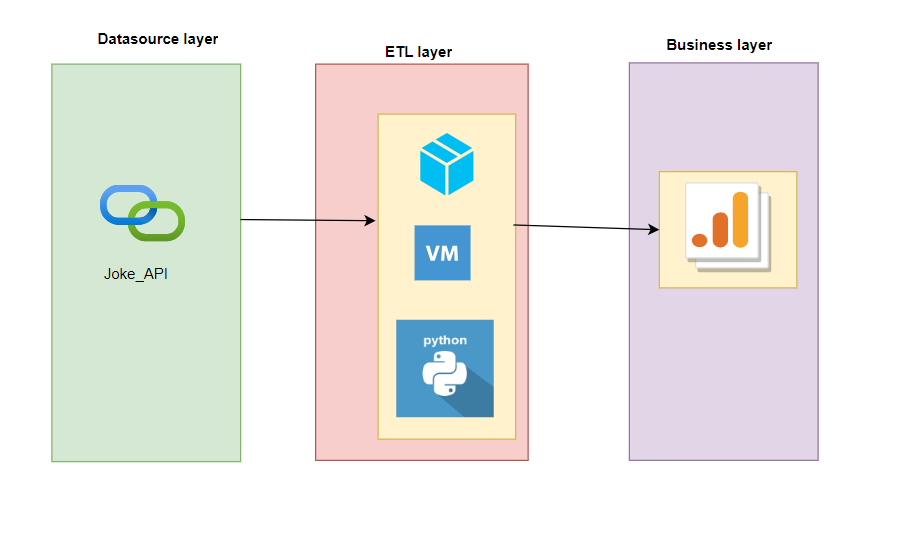

Дополнительная информация по работе с [Kaggle API](https://github.com/Kaggle/kaggle-api)

1. **Создайте ключ `API` в `Kaggle`**.

Моя учетная запись -> Settings-> API -> Создать новые токены API.

На ваш компьютер будет загружен файл `kaggle.json`. Вы можете загрузить на `Google` Диск вручную или использовать для загрузки приведенный ниже скрипт.

Если вы хотите использовать скрипт для загрузки файла `kaggle.json`, используйте следующий фрагмент в ячейке кода:

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marinasafina131","key":"44b7e27bf48440477fca37f8238f5992"}'}

Установите `Kaggle API`, используя

In [ ]:
!pip install -q kaggle

Переместите файл `kaggle.json` в **~/.kaggle**, где клиент `API` ожидает расположения вашего токена:

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Предоставьте разрешения на изменение, чтобы избежать предупреждения при запуске инструмента `Kaggle`.

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

Теперь можно получить доступ к наборам данных с помощью клиента

In [ ]:
!kaggle datasets list

ref                                                        title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                             Apple Quality                                     170KB  2024-01-11 14:31:07          15717        353  1.0              
bhavikjikadara/google-play-store-applications              Google Play Store Applications                    328KB  2024-02-13 06:48:02           1112         34  1.0              
nelgiriyewithana/emotions                                  Emotions                                           16MB  2024-02-05 16:01:39           2011         78  1.0              
joebeachcapital/valentines-day-consumer-data               Valentine's Day Consumer Data       

In [ ]:
import kaggle

# List of all datasets available on Kaggle
kaggle.api.dataset_list()

[nelgiriyewithana/apple-quality,
 bhavikjikadara/google-play-store-applications,
 nelgiriyewithana/emotions,
 joebeachcapital/valentines-day-consumer-data,
 joebeachcapital/chocolate-ratings,
 mrsimple07/car-prices-prediction-data,
 imyjoshua/average-time-spent-by-a-user-on-social-media,
 agarwalyashhh/best-selling-books,
 elvinrustam/coursera-dataset,
 beridzeg45/video-games,
 rrkcoder/swiggy-restaurants-dataset,
 bhavikjikadara/loan-status-prediction,
 shiivvvaam/top-youtuber-worldwide,
 dansbecker/melbourne-housing-snapshot,
 shiivvvaam/most-watched-movies-and-tv-shows,
 amitvkulkarni/hair-health,
 yukawithdata/spotify-top-tracks-2023,
 kanchana1990/2024-amazon-best-sellers-top-valentine-gifts,
 nimapourmoradi/heart-failure-clinical-records,
 hummaamqaasim/jobs-in-data]

In [ ]:
# поиск наборов данных в Kaggle о ""ключевое слово"""
datasets = kaggle.api.datasets_list(search="ENTERTAINMENT")

print(datasets)

[{'subtitleNullable': 'Exploring the Fascinating World of Movies and TV Shows with Finite Dataset', 'creatorNameNullable': 'Priyanshu Ganwani09', 'creatorUrlNullable': 'priyanshuganwani09', 'totalBytesNullable': 47840, 'urlNullable': 'https://www.kaggle.com/datasets/priyanshuganwani09/entertainment-movies-tv-shows-database', 'licenseNameNullable': 'CC0: Public Domain', 'descriptionNullable': None, 'ownerNameNullable': 'Priyanshu Ganwani09', 'ownerRefNullable': 'priyanshuganwani09', 'titleNullable': 'Entertainment (movies, tv shows) Dataset', 'currentVersionNumberNullable': 1, 'usabilityRatingNullable': 1.0, 'id': 3079951, 'ref': 'priyanshuganwani09/entertainment-movies-tv-shows-database', 'subtitle': 'Exploring the Fascinating World of Movies and TV Shows with Finite Dataset', 'hasSubtitle': True, 'creatorName': 'Priyanshu Ganwani09', 'hasCreatorName': True, 'creatorUrl': 'priyanshuganwani09', 'hasCreatorUrl': True, 'totalBytes': 47840, 'hasTotalBytes': True, 'url': 'https://www.kaggle

In [ ]:
!kaggle datasets list -s "ENTERTAINMENT"

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
priyanshuganwani09/entertainment-movies-tv-shows-database      Entertainment (movies, tv shows) Dataset             47KB  2023-04-02 17:52:36           1589         33  1.0              
gayu14/tv-and-movie-metadata-with-genres-and-ratings-imbd      TV & Movie Metadata with Genres and Ratings (2023)   16MB  2023-08-01 09:37:02           1319         42  0.9411765        
thedevastator/top-selling-nintendo-entertainment-system-games  Nintendo Entertainment System Games                  23KB  2022-11-11 17:47:38            892         28  0.85294116       
akash14/news-category-dataset                                  Ne

In [ ]:
!pip install pandas
import pandas as pd

In [ ]:
datasets = kaggle.api.datasets_list(search="ENTERTAINMENT")
df1=pd.DataFrame(datasets)
pd.DataFrame(datasets)

,subtitleNullable,creatorNameNullable,creatorUrlNullable,totalBytesNullable,urlNullable,licenseNameNullable,descriptionNullable,ownerNameNullable,ownerRefNullable,titleNullable,...,topicCount,viewCount,voteCount,currentVersionNumber,hasCurrentVersionNumber,usabilityRating,hasUsabilityRating,tags,files,versions
0,Exploring the Fascinating World of Movies and ...,Priyanshu Ganwani09,priyanshuganwani09,47840,https://www.kaggle.com/datasets/priyanshuganwa...,CC0: Public Domain,None,Priyanshu Ganwani09,priyanshuganwani09,"Entertainment (movies, tv shows) Dataset",...,0,8988,33,1,True,1.000000,True,"[{'nameNullable': 'movies and tv shows', 'desc...",[],[]
1,"Movie Marvels: Genre, Ratings & Directors - A...",Gayathri R,gayu14,16396553,https://www.kaggle.com/datasets/gayu14/tv-and-...,Other (specified in description),None,Gayathri R,gayu14,TV & Movie Metadata with Genres and Ratings (2...,...,0,6539,42,1,True,0.941176,True,"[{'nameNullable': 'arts and entertainment', 'd...",[],[]
2,Games released for the NES system,The Devastator,thedevastator,23618,https://www.kaggle.com/datasets/thedevastator/...,CC0: Public Domain,None,The Devastator,thedevastator,Nintendo Entertainment System Games,...,0,7089,28,3,True,0.852941,True,"[{'nameNullable': 'popular culture', 'descript...",[],[]
3,"News Category (Politics, Technology, Entertain...",Akash Gupta,akash14,2775062,https://www.kaggle.com/datasets/akash14/news-c...,Other (specified in description),None,Akash Gupta,akash14,News Category Dataset,...,0,11029,32,2,True,1.000000,True,"[{'nameNullable': 'categorical', 'descriptionN...",[],[]
4,What factors lead to customer satisfaction for...,TJ Klein,teejmahal20,2841945,https://www.kaggle.com/datasets/teejmahal20/ai...,Other (specified in description),None,TJ Klein,teejmahal20,Airline Passenger Satisfaction,...,0,487088,790,1,True,0.941176,True,"[{'nameNullable': 'classification', 'descripti...",[],[]
5,Exploring Entertainment Spots in Saudi Arabia,Mohammad Anas,anas123siddiqui,12140,https://www.kaggle.com/datasets/anas123siddiqu...,CC0: Public Domain,None,Mohammad Anas,anas123siddiqui,Entertainment in Saudi Arabia,...,0,1325,6,1,True,1.000000,True,"[{'nameNullable': 'arts and entertainment', 'd...",[],[]
6,Decoding Trends in Entertainment: A Deep Dive ...,Masood Ahmed,maso0dahmed,176353,https://www.kaggle.com/datasets/maso0dahmed/ne...,Apache 2.0,None,Masood Ahmed,maso0dahmed,Netflix Movies and Shows,...,0,13104,52,1,True,1.000000,True,"[{'nameNullable': 'movies and tv shows', 'desc...",[],[]
7,Unwrap the treasure trove of entertainment wit...,Ashpal Singh1525,ashpalsingh1525,88205,https://www.kaggle.com/datasets/ashpalsingh152...,Community Data License Agreement - Permissive ...,None,Ashpal Singh1525,ashpalsingh1525,Netflix Cleaned Dataset,...,0,12316,45,1,True,1.000000,True,"[{'nameNullable': 'movies and tv shows', 'desc...",[],[]
8,Collection of all Tv shows and Movies(~ 6.7k) ...,Yash Goel,goelyash,562952,https://www.kaggle.com/datasets/goelyash/disne...,CC BY-SA 3.0,None,Yash Goel,goelyash,Disney+ Hotstar Tv and Movie Catalog,...,0,15473,49,4,True,1.000000,True,"[{'nameNullable': 'arts and entertainment', 'd...",[],[]
9,Headlines and categories of 400k news stories ...,Ed King,kinguistics,29349834,https://www.kaggle.com/datasets/uciml/news-agg...,CC0: Public Domain,None,UCI Machine Learning,organizations/uciml,News Aggregator Dataset,...,0,104653,171,1,True,0.705882,True,"[{'nameNullable': 'earth and nature', 'descrip...",[],[]


In [ ]:
df1.to_excel("ENTERTAINMENT.xlsx", sheet_name='ENTERTAINMENT')

In [ ]:
from google.colab import files
files.download('ENTERTAINMENT.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Изучим датасет **The Times Higher Education World University Rankings**


Download Dataset.

In [ ]:
!kaggle datasets download -d shivamb/netflix-shows

  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 131MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("netflix-shows.zip","r") as zip_ref:

    # extracting content in the zipfile
    zip_ref.extractall()



In [ ]:
!ls

2011_rankings.csv  2019_rankings.csv		      ENTERTAINMENT.xlsx
2012_rankings.csv  2020_rankings.csv		      kaggle.json
2013_rankings.csv  2021_rankings.csv		      netflix-shows.zip
2014_rankings.csv  2022_rankings.csv		      netflix_titles.csv
2015_rankings.csv  2023_rankings.csv		      sample_data
2016_rankings.csv  education_ru.xlsx		      the-world-university-rankings-2011-2023.zip
2017_rankings.csv  entertainment-in-saudi-arabia.zip
2018_rankings.csv  Entertainment_KSA.csv


In [ ]:
# reading the contents
df = pd.read_csv("netflix_titles.csv")

# printing first 6 raws of the dataframe
df.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
97,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...
98,s99,TV Show,Octonauts: Above & Beyond,NaN,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,"British TV Shows, Kids' TV",The Octonauts expand their exploration beyond ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.isnull().sum().sum()

4307

In [ ]:
df.isna().sum()/(len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
df.isnull().sum()/(len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
df2 = df.dropna()

In [ ]:
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df2.isnull().values.any()

False

In [ ]:
df2.to_csv("netflix.csv")
from google.colab import files
files.download('netflix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Самостоятельная работа


3.1. Спроектировать верхнеуровневую архитектуру аналитического решения в `draw.io`. Необходимо использовать:

- Source Layer - слой источников данных.
- Storage Layer - слой хранения данных.
- Business Layer - слой для доступа к данным бизнес пользователей.

3.2. Получить ключ Kaggle API.

3.3. Настроить среду.

3.4. Провести поиск наборов данных в Kaggle по ключевому слову. Выполнить анализ данных датасета Kuggle, обновленный в `2023-2024` годах.

3.5. Провести анализ датасета на пустые значения. Очистить данные от нулевых и пустых значений. Выбрать только те данные, которые можно в дальнейщем анализировать(числовые характеристики, бинарные и т.д.).

3.6. Получить качественный датасет. Выгрузить его в формате `clear.csv`.

3.7. Реализовать визуализацию полученных метрик в отечественной BI-системе или в аналитических панелях с открытым исходным кодом, например `Apache Superset`.

Результаты практической работы представить в виде файла `ФИО.ipynb`, `clear.csv`.

**Вариант**.

`1-11` поиск ведем по ключевым словам,

вариант `12-35` - по названию Датасета.

`Ключевые слова`:

1. ENTERTAINMENT.
2. TRAVEL.
3. STYLE & BEAUTY.
4. PARENTING.
5. HEALTHY LIVING.
6. FOOD & DRINK.
7. BUSINESS.
8. COMEDY.
9. SPORTS.
10. HOME & LIVING.
11. PARENTS.

`ДАТАСЕТ`:

12. Credit Card Fraud Detection.
13. European Soccer Database.
14. Avocado Prices.
15. IBM HR Analytics Employee Attrition & Performance.
16. Medical Cost Personal Datasets.
17. Open Food Facts.
18. Machine Learning & Data Science Survey.
19. Survival Rate of Russian Companies.
20. Yandex: Geo Reviews Dataset 2023.
21. Yandex Music TOP 100 songs.
22. HeadHunter vacancies.
23. Russian Marketplace Reviews E-Commerce Dataset.
24. world economic.
25. credit card transicts.